In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import torch
from torch import nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
import os
import glob
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import datasets, linear_model, metrics

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
from sklearnex import patch_sklearn

pd.set_option('display.max_colwidth', None)

np.random.seed(0)

In [7]:
patch_sklearn()

def convert(df: pd.DataFrame, frame_size=11):
    x = np.asarray(df.iloc[:, 1]).reshape(-1, frame_size)
#     x = x[x.shape[0]//10:-x.shape[0]//10]
    return x

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
def indices(df):
#     return np.random.choice(df.shape[0], size=2000, replace=False, p=None)
    return df[1000:-1000]

def indicesSmaller(df):
    indices = np.random.choice(df.shape[0], size=400, replace=False, p=None)
    return df[indices, :]

In [5]:
def silence(x): 
    if(x < 4.2):
        return 0 
    else: 
        return 1
vfunc = np.vectorize(silence)

In [6]:
from joblib import dump,load
#dump(reg, 'Model4flowSense4.joblib')
reg = load('Model4flowSense4.joblib')

[78.         30.4723     76.8261     15.3848     22.3607     15.7192
  6.4614      8.698       2.          3.51       10.18475755]


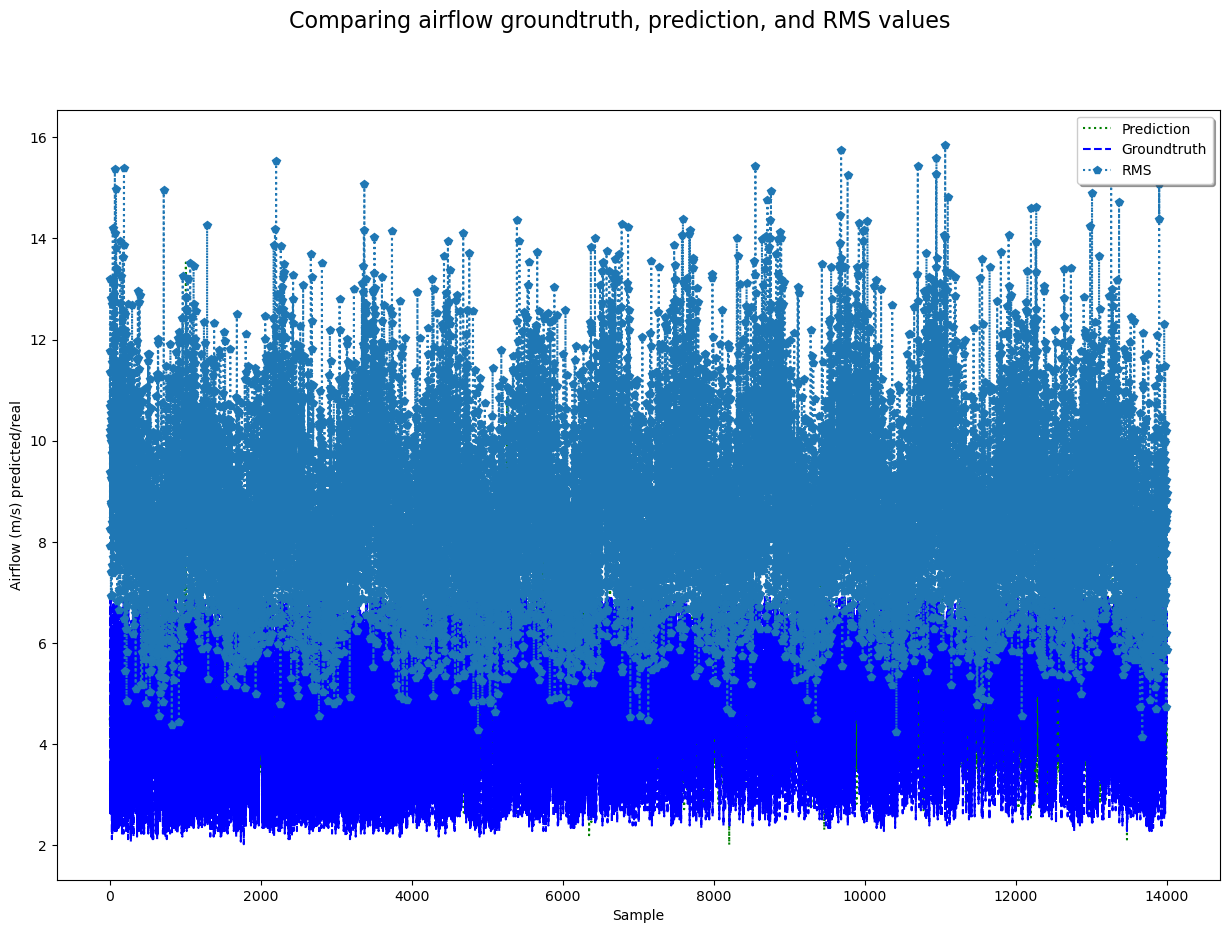

In [20]:
data_dir = Path("./RealWorld") 
df1 = pd.read_csv(data_dir / "fft_50_U_P1.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df1 = df1[df1['frequency'] != "clocktime"]
df1 = df1.dropna()

df = convert(df1)

print(df[0])
indices = range(1000,15000)

X = df[:,:-1]
X = X[indices,:4]
X.shape

pred = reg.predict(X)

rms = df[indices, -1]

y = df[indices, -2]
y.shape

fig1, ax1 = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(10)
fig1.suptitle('Comparing airflow groundtruth, prediction, and RMS values', fontsize=16)
l0, = ax1.plot(pred, 'g:', alpha = 0.5)
l1, = ax1.plot(y, 'b--', alpha = 0.5)
l2, = ax1.plot(rms, 'p:', alpha = 0.5)
ax1.legend((l0, l1, l2), ('Prediction', 'Groundtruth', 'RMS'), loc='upper right', shadow=True)
ax1.set_xlabel("Sample")
ax1.set_ylabel("Airflow (m/s) predicted/real")
plt.show()

In [53]:
#Looking at predictions for each class of airflow (low, med, high):
accuracies = []
precisions = []
recalls = []

#low airflow
for indices in [range(2000)]:
    X = df_low[:,:-1]
    X = X[indices, :4]
    X.shape

    pred = vfunc(reg.predict(X))

    y = df_low[indices, -1]
    y.shape

    print("Low Score: ", accuracy_score(pred,y))
    accuracies.append(accuracy_score(pred,y))
    precisions.append(precision_score(pred,y,average='micro'))
    recalls.append(recall_score(pred,y,average='micro'))
    print(pred)
    

#mid airflow
for indices in [range(2000)]:
    X = df_mid[:,:-1]
    X = X[indices, :4]
    X.shape

    pred = vfunc(reg.predict(X))

    y = df_mid[indices, -1]
    y.shape

    print("Mid Score: ", accuracy_score(pred,y))
    accuracies.append(accuracy_score(pred,y))
    precisions.append(precision_score(pred,y,average='micro'))
    recalls.append(recall_score(pred,y,average='micro'))
    

#high airflow
for indices in [range(2000)]:
    X = df_high[:,:-1]
    X = X[indices, :4]
    X.shape

    pred = vfunc(reg.predict(X))

    y = df_high[indices, -1]
    y.shape

    print("High Score: ", accuracy_score(pred,y))
    accuracies.append(accuracy_score(pred,y))
    precisions.append(precision_score(pred,y,average='micro'))
    recalls.append(recall_score(pred,y,average='micro'))
    
print(accuracies)
print(precisions)
print(recalls)

Low Score:  0.7045
[0 1 0 ... 0 0 0]
Mid Score:  0.863
High Score:  0.9565
[0.7045, 0.863, 0.9565]
[0.7045, 0.863, 0.9565]
[0.7045, 0.863, 0.9565]


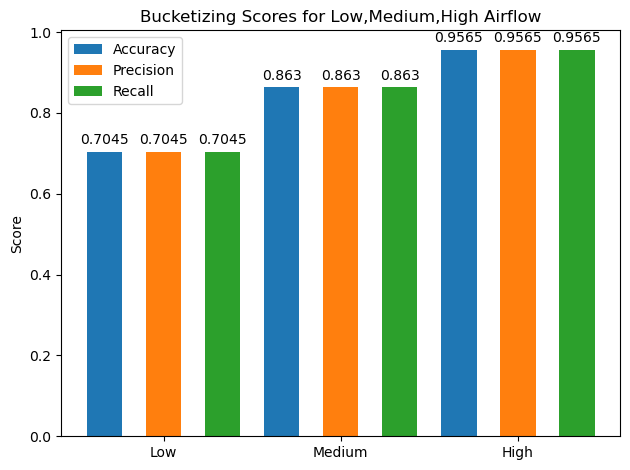

In [54]:
# Define labels, positions, bar heights and error bar heights
labels = ['Low', 'Medium', 'High']

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - (width/3*5), accuracies, width, label='Accuracy')
rects2 = ax.bar(x, precisions, width, label='Precision')
rects3 = ax.bar(x + (width/3*5), recalls, width, label='Recall')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Bucketizing Scores for Low,Medium,High Airflow')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

fig.tight_layout()

plt.show()

Mean Squared Error:  0.267
Score:  0.75325


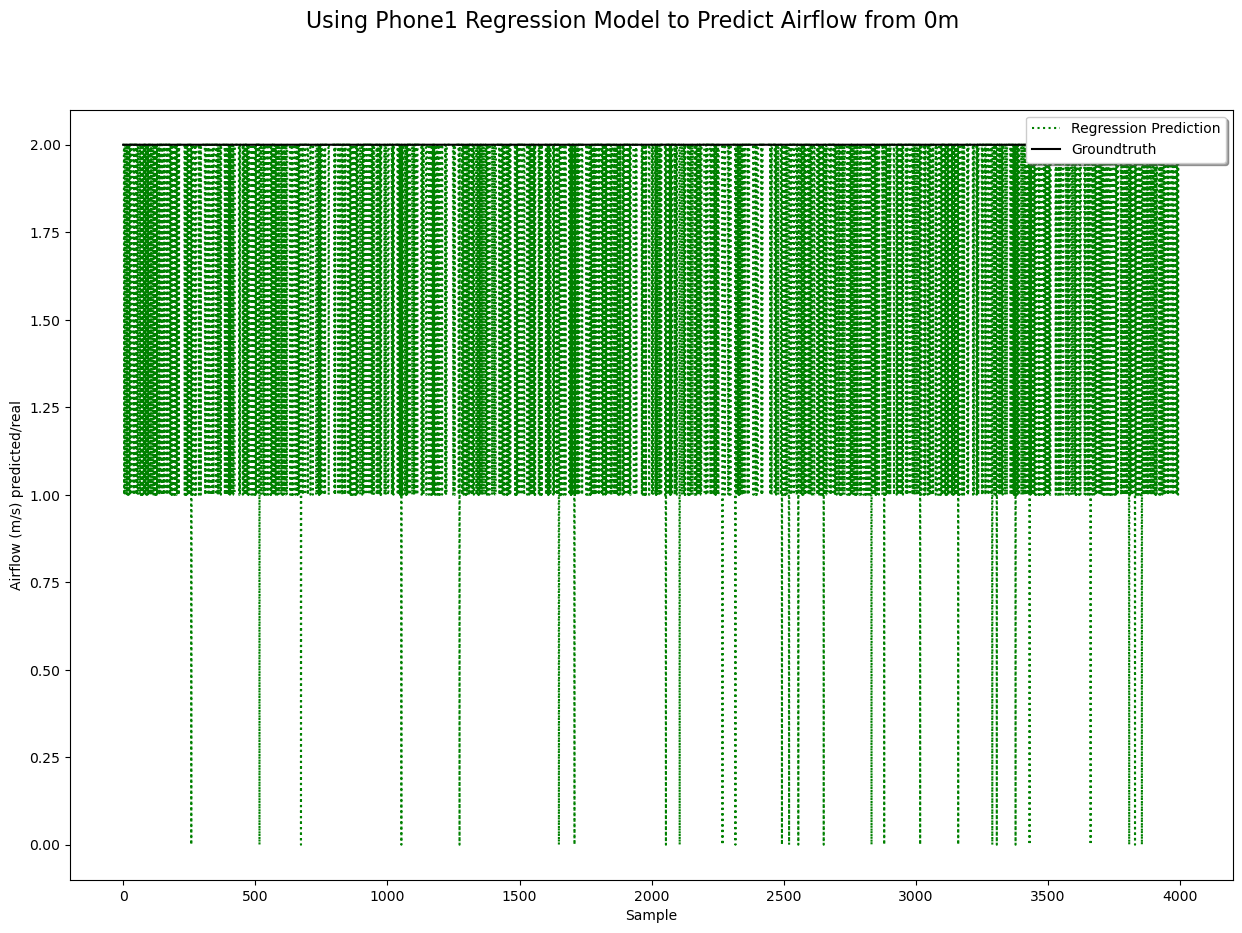

In [141]:
#Looking at predictions from SideVent 0m
data_dir = Path("./SideVent") 
df10 = pd.read_csv(data_dir / "fft_0_0_SideVent_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df10 = df10[df10['frequency'] != "clocktime"]
df10 = df10.dropna()

df11 = pd.read_csv(data_dir / "fft_100_0_SideVent_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df11 = df11[df11['frequency'] != "clocktime"]
df11 = df11.dropna()

df = df10.append([df11])
df = convert(df)

indices = np.random.choice(np.arange(df.shape[0]), size=4000, replace=False, p=None)
    
X = df[:,:-1]
X = X[indices, :4]
X.shape

row = vfunc(df[:,9])
df = np.append(df, row.reshape(-1,1), 1)
pred = vfunc(reg.predict(X))

y = df[indices, -1]
y.shape
    
print("Mean Squared Error: ", mean_squared_error(pred, y))
print("Score: ", accuracy_score(pred,y))

fig1, ax1 = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(10)
fig1.suptitle('Using Phone1 Regression Model to Predict Airflow from 0m', fontsize=16)
l0, = ax1.plot(pred, 'g:')
l1, = ax1.plot(y, 'k-')
ax1.legend((l0, l1), ('Regression Prediction', 'Groundtruth'), loc='upper right', shadow=True)
ax1.set_xlabel("Sample")
ax1.set_ylabel("Airflow (m/s) predicted/real")
plt.show()

Mean Squared Error:  0.49075
Score:  0.53025


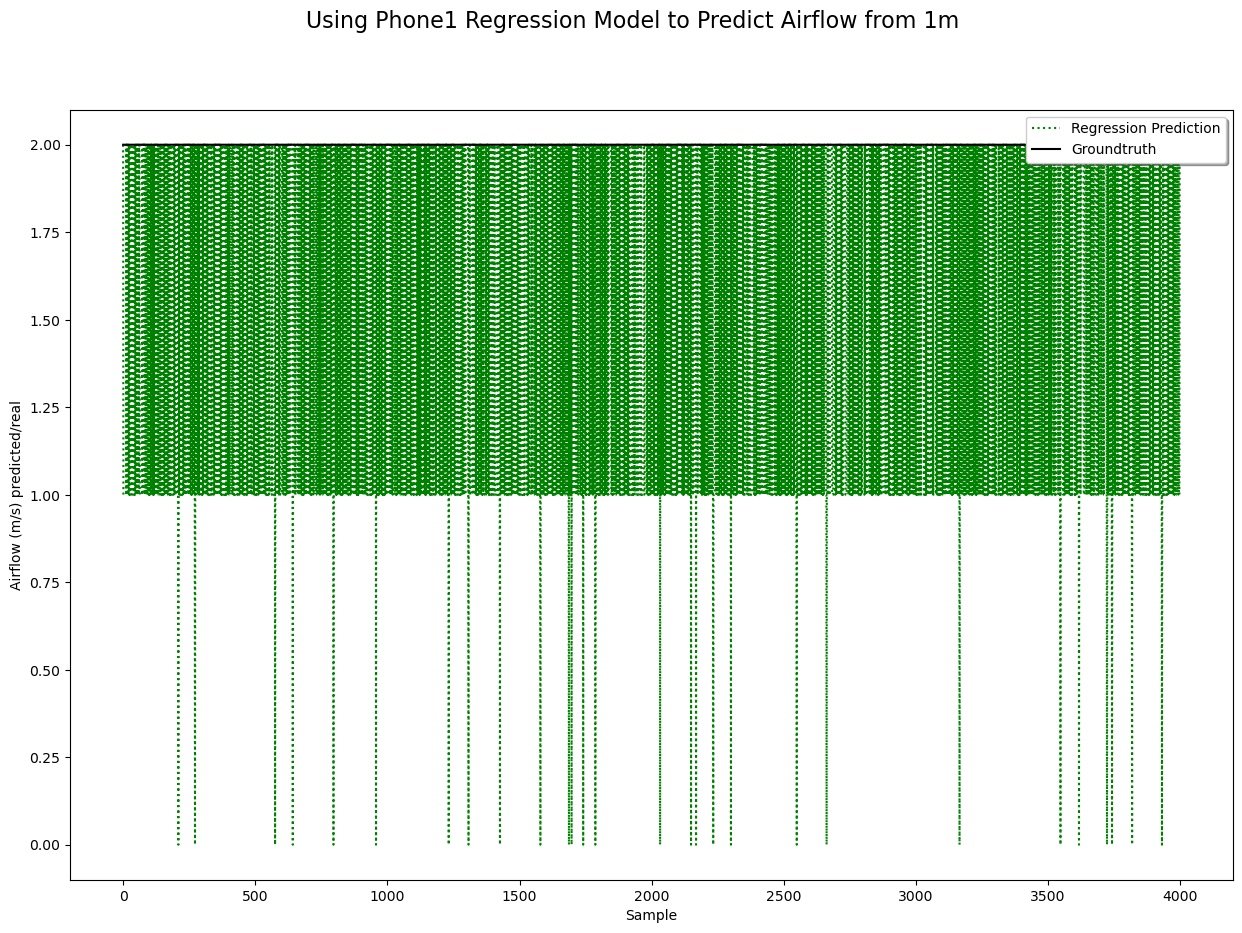

In [142]:
#Looking at predictions from SideVent 1m
data_dir = Path("./SideVent") 
df10 = pd.read_csv(data_dir / "fft_100_0_SideVent_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df10 = df10[df10['frequency'] != "clocktime"]
df10 = df10.dropna()
df = convert(df10)

indices = np.random.choice(np.arange(df.shape[0]), size=4000, replace=False, p=None)
    
X = df[:,:-1]
X = X[indices, :4]
X.shape

row = vfunc(df[:,9])
df = np.append(df, row.reshape(-1,1), 1)
pred = vfunc(reg.predict(X))

y = df[indices, -1]
y.shape
    
print("Mean Squared Error: ", mean_squared_error(pred, y))
print("Score: ", accuracy_score(pred,y))

fig1, ax1 = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(10)
fig1.suptitle('Using Phone1 Regression Model to Predict Airflow from 1m', fontsize=16)
l0, = ax1.plot(pred, 'g:')
l1, = ax1.plot(y, 'k-')
ax1.legend((l0, l1), ('Regression Prediction', 'Groundtruth'), loc='upper right', shadow=True)
ax1.set_xlabel("Sample")
ax1.set_ylabel("Airflow (m/s) predicted/real")
plt.show()

In [143]:
MSE_scores05 = []
MSE_scores10 = []
MSE_scores15 = []
MSE_scores22 = []

Mean Squared Error:  0.03
Score:  0.9706818181818182


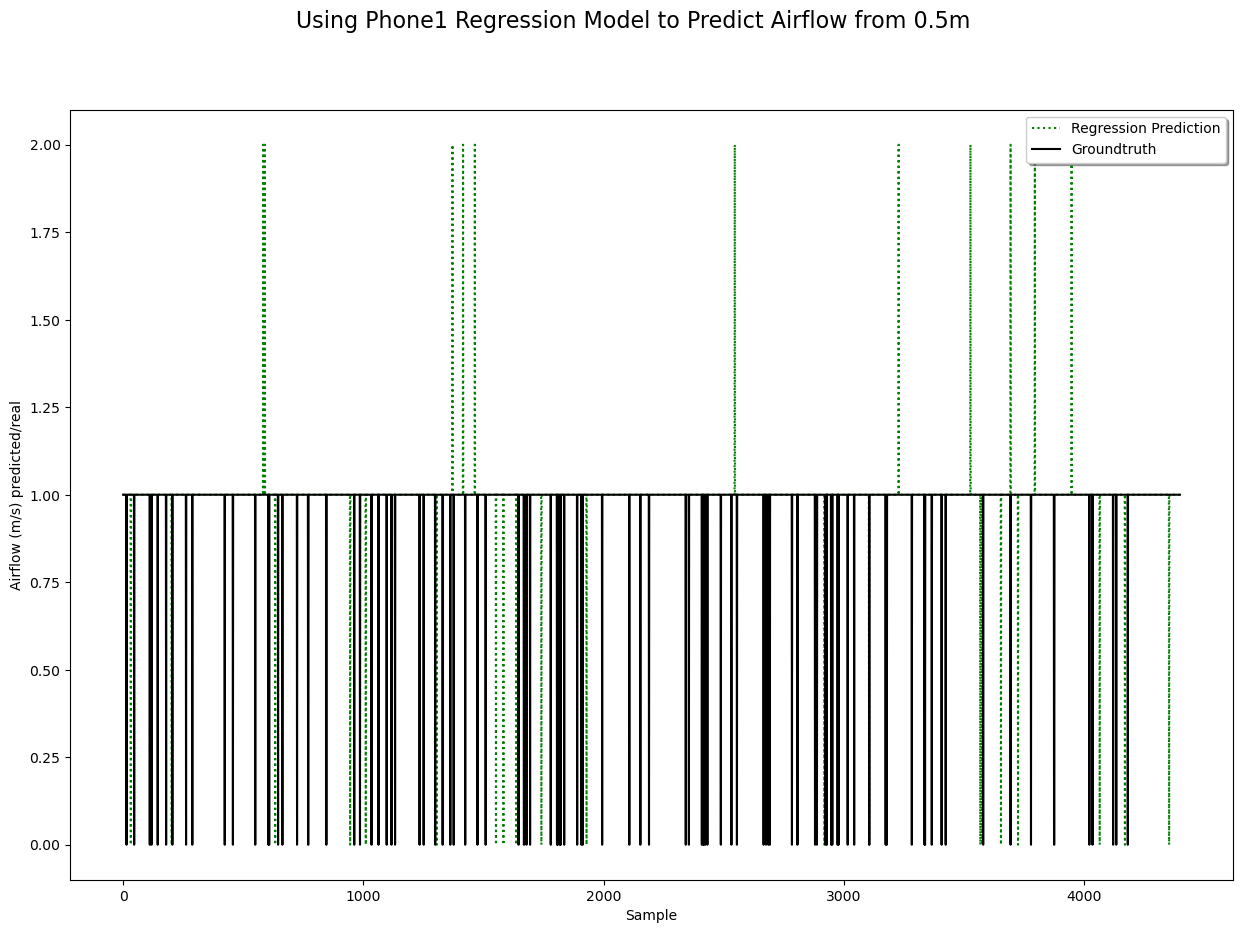

Mean Squared Error:  0.03295454545454545
Score:  0.9677272727272728
Mean Squared Error:  0.034772727272727275
Score:  0.9652272727272727
Mean Squared Error:  0.027045454545454546
Score:  0.9729545454545454
Mean Squared Error:  0.02590909090909091
Score:  0.9747727272727272
Mean Squared Error:  0.03431818181818182
Score:  0.9656818181818182
[0.03295454545454545, 0.034772727272727275, 0.027045454545454546, 0.02590909090909091, 0.03431818181818182]


In [144]:
#Looking at predictions from 0.5m
data_dir = Path("./50cm") 
df1 = pd.read_csv(data_dir / "fft_50_0_Vent1_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df1 = df1[df1['frequency'] != "clocktime"]
df1 = df1.dropna()
# df36 = df36[:129*198]

df2 = pd.read_csv(data_dir / "fft_50_180_Vent1_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df2 = df2[df2['frequency'] != "clocktime"]
df2 = df2.dropna()

df3 = pd.read_csv(data_dir / "fft_50_90_Vent1_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df3 = df3[df3['frequency'] != "clocktime"]
df3 = df3.dropna()

df = df1
df = convert(df)

indices = np.random.choice(np.arange(df.shape[0]), size=4400, replace=False, p=None)
    
X = df[:,:-1]
X = X[indices, :4]
X.shape

row = vfunc(df[:,9])
df = np.append(df, row.reshape(-1,1), 1)
pred = vfunc(reg.predict(X))

y = df[indices, -1]
y.shape
    
print("Mean Squared Error: ", mean_squared_error(pred, y))
print("Score: ", accuracy_score(pred,y))

fig1, ax1 = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(10)
fig1.suptitle('Using Phone1 Regression Model to Predict Airflow from 0.5m', fontsize=16)
l0, = ax1.plot(pred, 'g:')
l1, = ax1.plot(y, 'k-')
ax1.legend((l0, l1), ('Regression Prediction', 'Groundtruth'), loc='upper right', shadow=True)
ax1.set_xlabel("Sample")
ax1.set_ylabel("Airflow (m/s) predicted/real")
plt.show()

for indices in [range(4400), range(4400,8800), range(8800,13200), range(13200, 17600), range(17600, 22000)]:
    X = df[:,:-1]
    X = X[indices, :4]
    X.shape

    row = vfunc(df[:,9])
    df = np.append(df, row.reshape(-1,1), 1)
    pred = vfunc(reg.predict(X))

    y = df[indices, -1]
    y.shape

    print("Mean Squared Error: ", mean_squared_error(pred, y))
    print("Score: ", accuracy_score(pred,y))
    MSE_scores05.append(mean_squared_error(pred, y))
    
print(MSE_scores05)

Mean Squared Error:  0.01
Score:  0.99


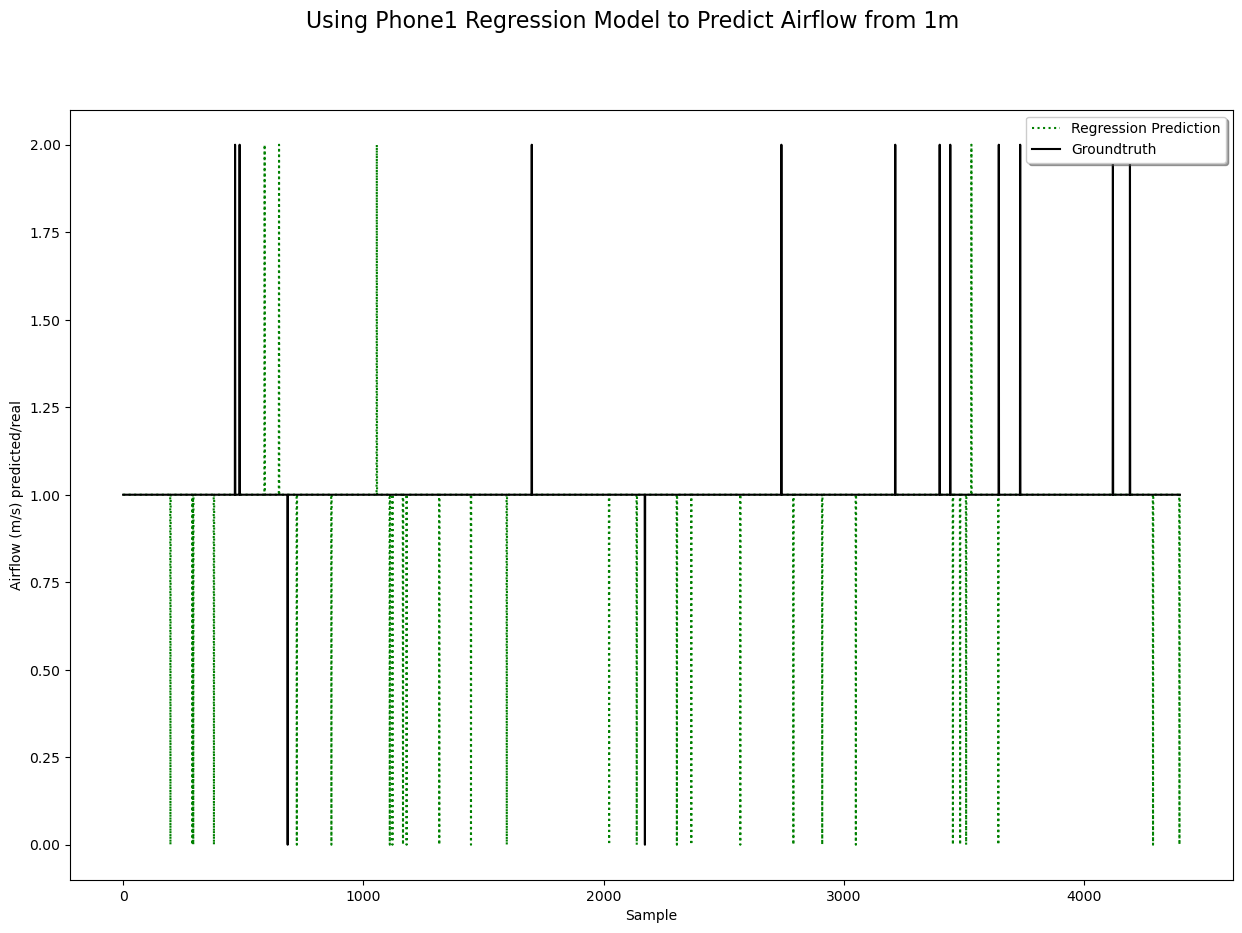

Mean Squared Error:  0.05477272727272727
Score:  0.9452272727272727
Mean Squared Error:  0.009772727272727273
Score:  0.9902272727272727
Mean Squared Error:  0.018863636363636364
Score:  0.9811363636363636
Mean Squared Error:  0.006818181818181818
Score:  0.9931818181818182
Mean Squared Error:  0.006136363636363636
Score:  0.9938636363636364
[0.05477272727272727, 0.009772727272727273, 0.018863636363636364, 0.006818181818181818, 0.006136363636363636]


In [145]:
#Looking at predictions from 1m
data_dir = Path("./1m") 
df4 = pd.read_csv(data_dir / "fft_100_0_Vent1_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df4 = df4[df4['frequency'] != "clocktime"]
df4 = df4.dropna()

df5 = pd.read_csv(data_dir / "fft_100_180_Vent1_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df5 = df5[df5['frequency'] != "clocktime"]
df5 = df5.dropna()

df6 = pd.read_csv(data_dir / "fft_100_90_Vent1_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df6 = df6[df6['frequency'] != "clocktime"]
df6 = df6.dropna()

df = df4
df = convert(df)

indices = np.random.choice(np.arange(df.shape[0]), size=4400, replace=False, p=None)
    
X = df[:,:-1]
X = X[indices, :4]
X.shape

row = vfunc(df[:,9])
df = np.append(df, row.reshape(-1,1), 1)
pred = vfunc(reg.predict(X))

y = df[indices, -1]
y.shape
    
print("Mean Squared Error: ", mean_squared_error(pred, y))
print("Score: ", accuracy_score(pred,y))

fig1, ax1 = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(10)
fig1.suptitle('Using Phone1 Regression Model to Predict Airflow from 1m', fontsize=16)
l0, = ax1.plot(pred, 'g:')
l1, = ax1.plot(y, 'k-')
ax1.legend((l0, l1), ('Regression Prediction', 'Groundtruth'), loc='upper right', shadow=True)
ax1.set_xlabel("Sample")
ax1.set_ylabel("Airflow (m/s) predicted/real")
plt.show()

for indices in [range(4400), range(4400,8800), range(8800,13200), range(13200, 17600), range(17600, 22000)]:
    X = df[:,:-1]
    X = X[indices, :4]
    X.shape

    row = vfunc(df[:,9])
    df = np.append(df, row.reshape(-1,1), 1)
    pred = vfunc(reg.predict(X))

    y = df[indices, -1]
    y.shape

    print("Mean Squared Error: ", mean_squared_error(pred, y))
    print("Score: ", accuracy_score(pred,y))
    MSE_scores10.append(mean_squared_error(pred, y))
    
print(MSE_scores10)

Mean Squared Error:  0.0565
Score:  0.9435


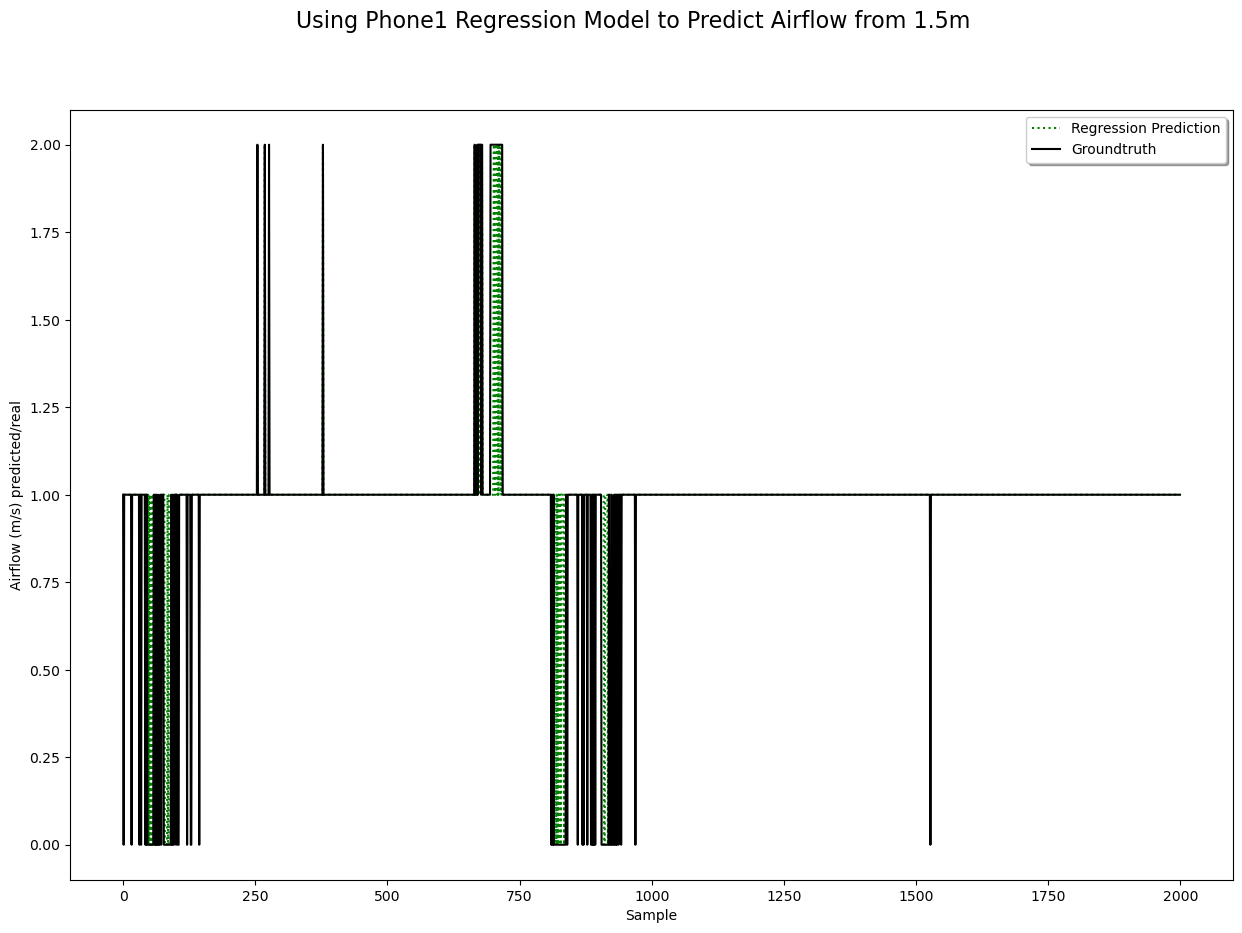

Mean Squared Error:  0.0565
Score:  0.9435
Mean Squared Error:  0.1515
Score:  0.8485
Mean Squared Error:  0.2335
Score:  0.7665
Mean Squared Error:  0.25
Score:  0.75
Mean Squared Error:  0.195
Score:  0.808
[0.0565, 0.1515, 0.2335, 0.25, 0.195]


In [146]:
#Looking at predictions from 1.5m
data_dir = Path("./1.5m") 
df7 = pd.read_csv(data_dir / "fft_150_0_Vent1_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df7 = df7[df7['frequency'] != "clocktime"]
df7 = df7.dropna()

df8 = pd.read_csv(data_dir / "fft_150_90_Vent1_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df8 = df8[df8['frequency'] != "clocktime"]
df8 = df8.dropna()

df9 = pd.read_csv(data_dir / "fft_150_180_Vent1_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df9 = df9[df9['frequency'] != "clocktime"]
df9 = df9.dropna()

df = df7
df = convert(df)
df.shape

indices = range(2000)
    
X = df[:,:-1]
X = X[indices, :4]
X.shape

row = vfunc(df[:,9])
df = np.append(df, row.reshape(-1,1), 1)
pred = vfunc(reg.predict(X))

y = df[indices, -1]
y.shape
    
print("Mean Squared Error: ", mean_squared_error(pred, y))
print("Score: ", accuracy_score(pred,y))

fig1, ax1 = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(10)
fig1.suptitle('Using Phone1 Regression Model to Predict Airflow from 1.5m', fontsize=16)
l0, = ax1.plot(pred, 'g:')
l1, = ax1.plot(y, 'k-')
ax1.legend((l0, l1), ('Regression Prediction', 'Groundtruth'), loc='upper right', shadow=True)
ax1.set_xlabel("Sample")
ax1.set_ylabel("Airflow (m/s) predicted/real")
plt.show()

for indices in [range(2000), range(2000,4000), range(4000,6000), range(6000,7000), range(7000,8000)]:
    X = df[:,:-1]
    X = X[indices, :4]
    X.shape

    row = vfunc(df[:,9])
    df = np.append(df, row.reshape(-1,1), 1)
    pred = vfunc(reg.predict(X))

    y = df[indices, -1]
    y.shape

    print("Mean Squared Error: ", mean_squared_error(pred, y))
    print("Score: ", accuracy_score(pred,y))
    MSE_scores15.append(mean_squared_error(pred, y))
    
print(MSE_scores15)

Mean Squared Error:  0.376
Score:  0.65925


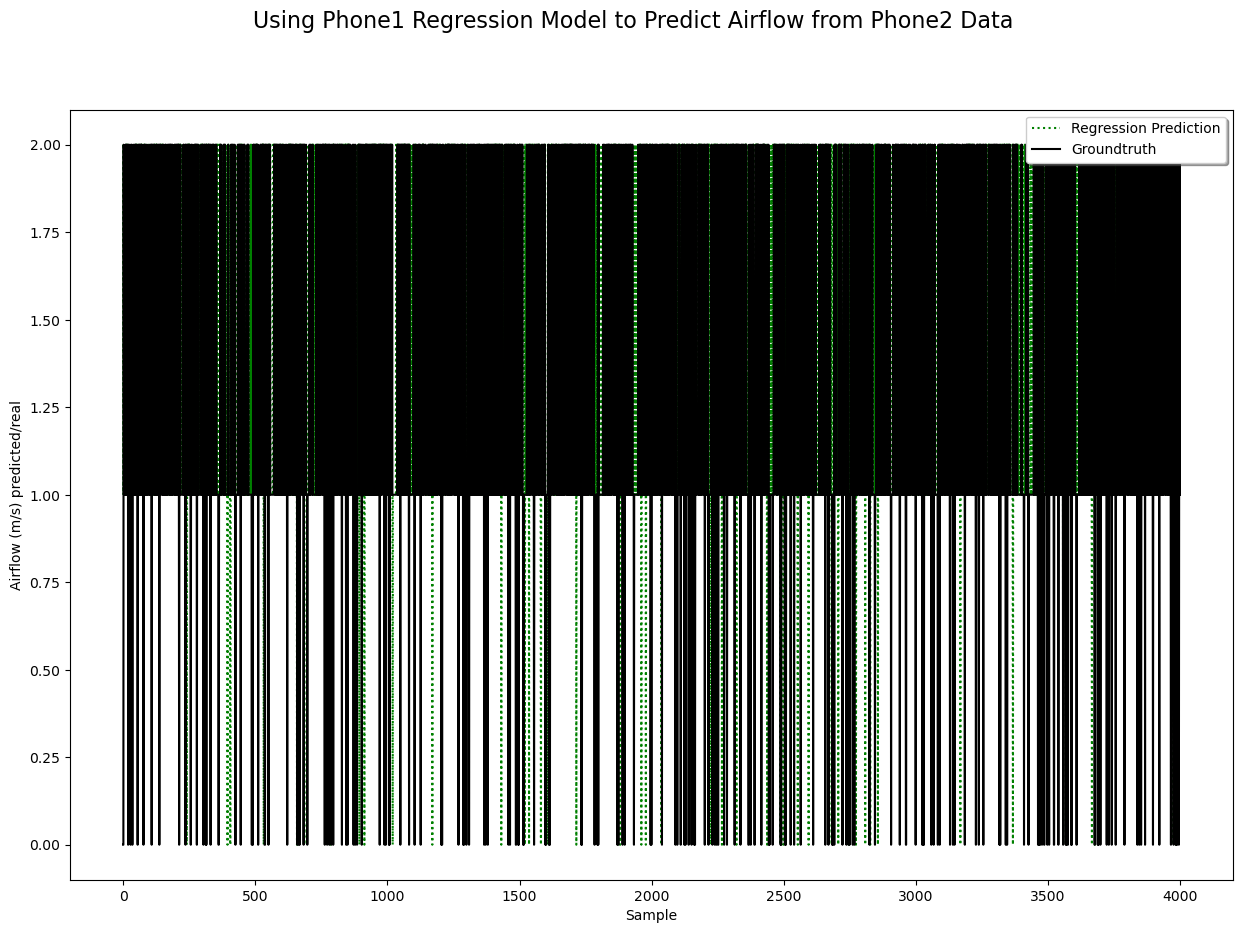

In [147]:
#Looking at predicting values from Phone 2
#PHONE 2 DATA
data_dir = Path("./DiverseDataFromPhone2") 
df11 = pd.read_csv(data_dir / "fft1.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df11 = df11[df11['frequency'] != "clocktime"]
df11 = df11.dropna()

df12 = pd.read_csv(data_dir / "fft2.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df12 = df12[df12['frequency'] != "clocktime"]
df12 = df12.dropna()

df13 = pd.read_csv(data_dir / "fft3.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df13 = df13[df13['frequency'] != "clocktime"]
df13 = df13.dropna()

df14 = pd.read_csv(data_dir / "fft4.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df14 = df14[df14['frequency'] != "clocktime"]
df14 = df14.dropna()

df15 = pd.read_csv(data_dir / "fft5.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df15 = df15[df15['frequency'] != "clocktime"]
df15 = df15.dropna()

df = df11.append([df12, df13, df14, df15])
data_mid = convert(df)
data_mid.shape

indices = np.random.choice(np.arange(data_mid.shape[0]), size=4000, replace=False, p=None)
    
X = data_mid[:,:-1]
X = X[indices, :4]
X.shape

row = vfunc(data_mid[:,9])
data_mid = np.append(data_mid, row.reshape(-1,1), 1)
pred = vfunc(reg.predict(X))

y = data_mid[indices, -1]
y.shape
    
print("Mean Squared Error: ", mean_squared_error(pred, y))
print("Score: ", accuracy_score(pred,y))

fig1, ax1 = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(10)
fig1.suptitle('Using Phone1 Regression Model to Predict Airflow from Phone2 Data', fontsize=16)
l0, = ax1.plot(pred, 'g:')
l1, = ax1.plot(y, 'k-')
ax1.legend((l0, l1), ('Regression Prediction', 'Groundtruth'), loc='upper right', shadow=True)
ax1.set_xlabel("Sample")
ax1.set_ylabel("Airflow (m/s) predicted/real")
plt.show()

Mean Squared Error:  0.20525
Score:  0.79475


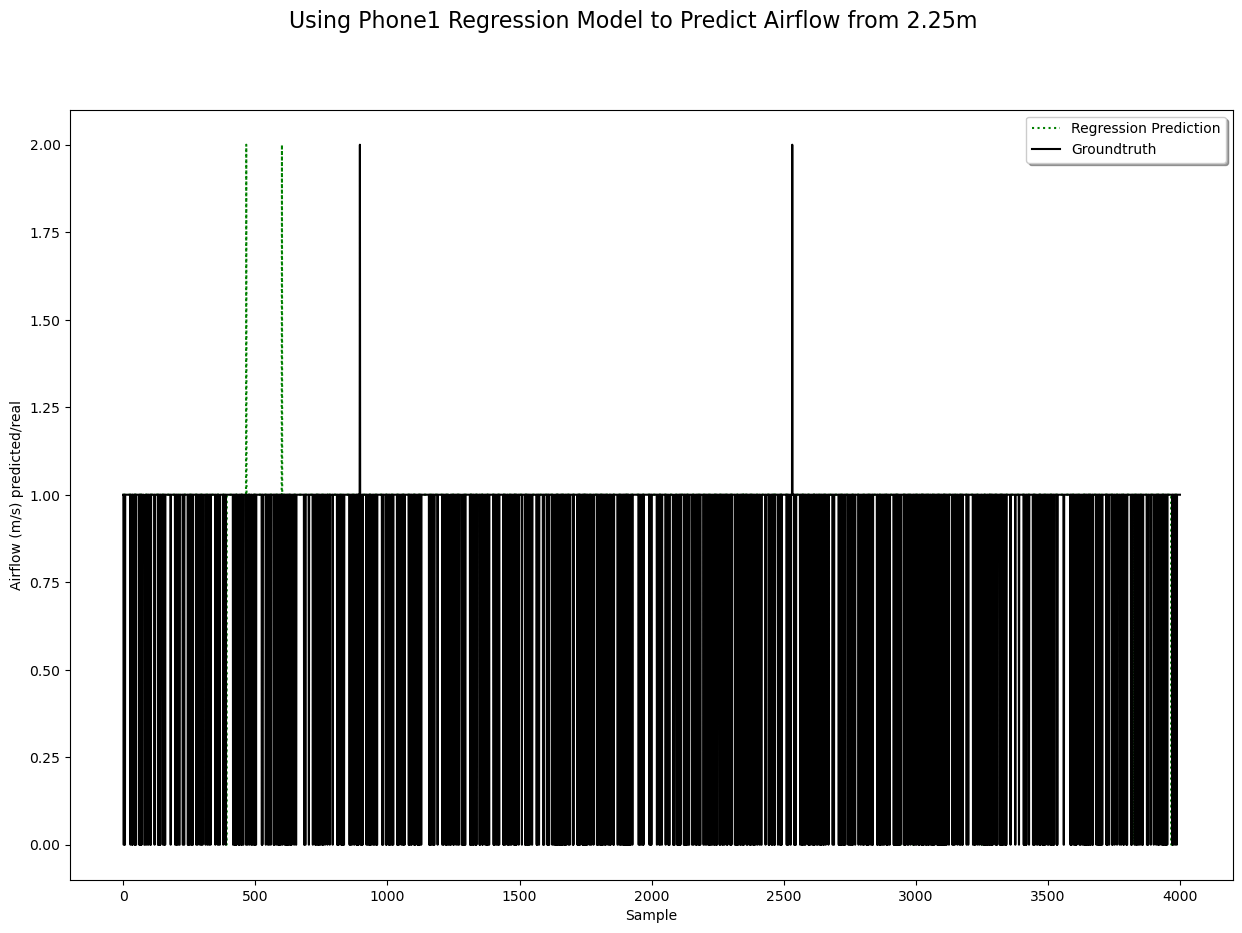

Mean Squared Error:  0.1375
Score:  0.8625
Mean Squared Error:  0.3085
Score:  0.6915
Mean Squared Error:  0.299
Score:  0.701
Mean Squared Error:  0.09
Score:  0.91
Mean Squared Error:  0.197
Score:  0.803
[0.1375, 0.3085, 0.299, 0.09, 0.197]


In [148]:
#Looking at predictions from 2.25m
data_dir = Path("./2.25m") 
df1 = pd.read_csv(data_dir / "fft_225_90_Vent1_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df1 = df1[df1['frequency'] != "clocktime"]
df1 = df1.dropna()

df2 = pd.read_csv(data_dir / "fft_225_90_Vent2_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df2 = df2[df2['frequency'] != "clocktime"]
df2 = df2.dropna()

df3 = pd.read_csv(data_dir / "fft_225_180_Vent1_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df3 = df3[df3['frequency'] != "clocktime"]
df3 = df3.dropna()

df4 = pd.read_csv(data_dir / "fft_225_0_Vent1_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df4 = df4[df4['frequency'] != "clocktime"]
df4 = df4.dropna()

df = df4
df = convert(df)
df.shape

indices = np.random.choice(np.arange(df.shape[0]), size=4000, replace=False, p=None)
    
X = df[:,:-1]
X = X[indices, :4]
X.shape

row = vfunc(df[:,9])
df = np.append(df, row.reshape(-1,1), 1)
pred = vfunc(reg.predict(X))

y = df[indices, -1]
y.shape
    
print("Mean Squared Error: ", mean_squared_error(pred, y))
print("Score: ", accuracy_score(pred,y))

fig1, ax1 = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(10)
fig1.suptitle('Using Phone1 Regression Model to Predict Airflow from 2.25m', fontsize=16)
l0, = ax1.plot(pred, 'g:')
l1, = ax1.plot(y, 'k-')
ax1.legend((l0, l1), ('Regression Prediction', 'Groundtruth'), loc='upper right', shadow=True)
ax1.set_xlabel("Sample")
ax1.set_ylabel("Airflow (m/s) predicted/real")
plt.show()

for indices in [range(2000), range(2000,4000), range(4000,6000), range(6000,7000), range(7000,8000)]:
    X = df[:,:-1]
    X = X[indices, :4]
    X.shape

    row = vfunc(df[:,9])
    df = np.append(df, row.reshape(-1,1), 1)
    pred = vfunc(reg.predict(X))

    y = df[indices, -1]
    y.shape

    print("Mean Squared Error: ", mean_squared_error(pred, y))
    print("Score: ", accuracy_score(pred,y))
    MSE_scores22.append(mean_squared_error(pred, y))
    
print(MSE_scores22)

Mean Squared Error:  0.087
Score:  0.91525


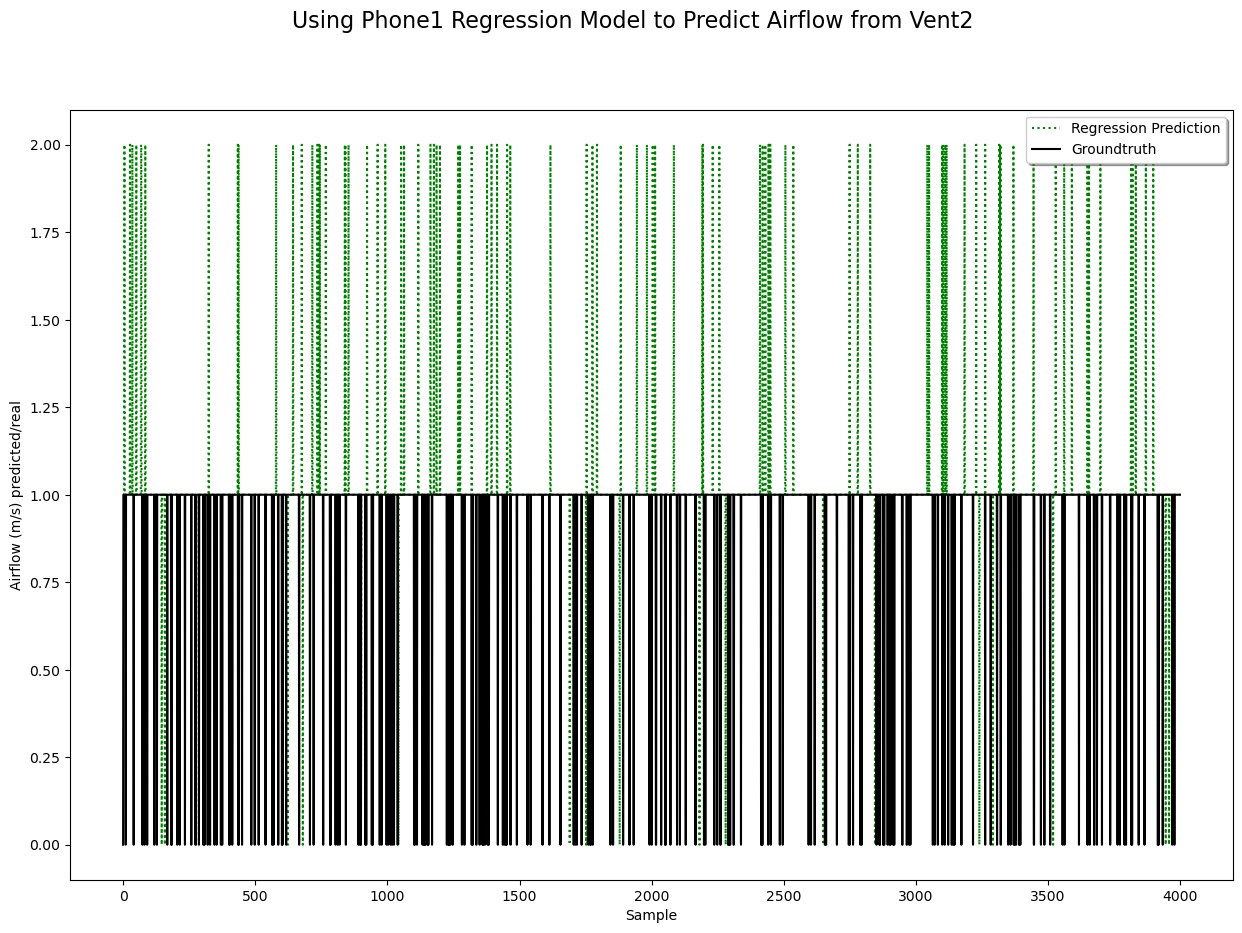

In [149]:
#Looking at predictions from Vent2
data_dir = Path("./Vent2") 
df2 = pd.read_csv(data_dir / "fft_100_0_Vent2_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df2 = df2[df2['frequency'] != "clocktime"]
df2 = df2.dropna()

df = df2
df = convert(df)
df.shape

indices = np.random.choice(np.arange(df.shape[0]), size=4000, replace=False, p=None)
    
X = df[:,:-1]
X = X[indices, :4]
X.shape

row = vfunc(df[:,9])
df = np.append(df, row.reshape(-1,1), 1)
pred = vfunc(reg.predict(X))

y = df[indices, -1]
y.shape
    
print("Mean Squared Error: ", mean_squared_error(pred, y))
print("Score: ", accuracy_score(pred,y))

fig1, ax1 = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(10)
fig1.suptitle('Using Phone1 Regression Model to Predict Airflow from Vent2', fontsize=16)
l0, = ax1.plot(pred, 'g:')
l1, = ax1.plot(y, 'k-')
ax1.legend((l0, l1), ('Regression Prediction', 'Groundtruth'), loc='upper right', shadow=True)
ax1.set_xlabel("Sample")
ax1.set_ylabel("Airflow (m/s) predicted/real")
plt.show()

Mean Squared Error:  0.01625
Score:  0.98375


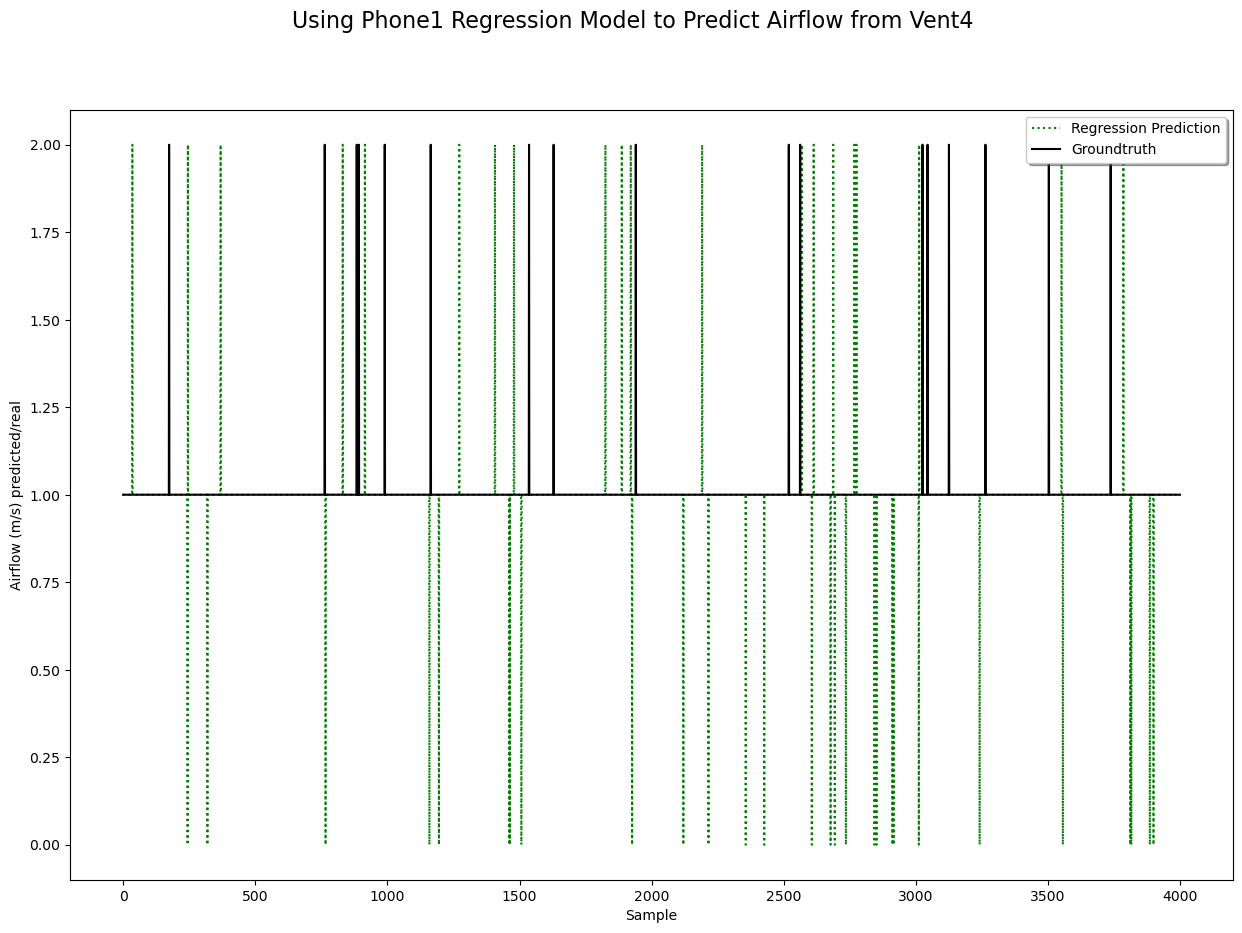

In [150]:
#Looking at predictions from Vent4
data_dir = Path("./Vent4 (CICS)") 
df1 = pd.read_csv(data_dir / "fft_100_0_Vent4_0.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df1 = df1[df1['frequency'] != "clocktime"]
df1 = df1.dropna()

df = df1
df = convert(df)
df.shape

indices = np.random.choice(np.arange(df.shape[0]), size=4000, replace=False, p=None)
    
X = df[:,:-1]
X = X[indices, :4]
X.shape

row = vfunc(df[:,9])
df = np.append(df, row.reshape(-1,1), 1)
pred = vfunc(reg.predict(X))

y = df[indices, -1]
y.shape
    
print("Mean Squared Error: ", mean_squared_error(pred, y))
print("Score: ", accuracy_score(pred,y))

fig1, ax1 = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(10)
fig1.suptitle('Using Phone1 Regression Model to Predict Airflow from Vent4', fontsize=16)
l0, = ax1.plot(pred, 'g:')
l1, = ax1.plot(y, 'k-')
ax1.legend((l0, l1), ('Regression Prediction', 'Groundtruth'), loc='upper right', shadow=True)
ax1.set_xlabel("Sample")
ax1.set_ylabel("Airflow (m/s) predicted/real")
plt.show()

Mean Squared Error:  0.17375
Score:  0.836


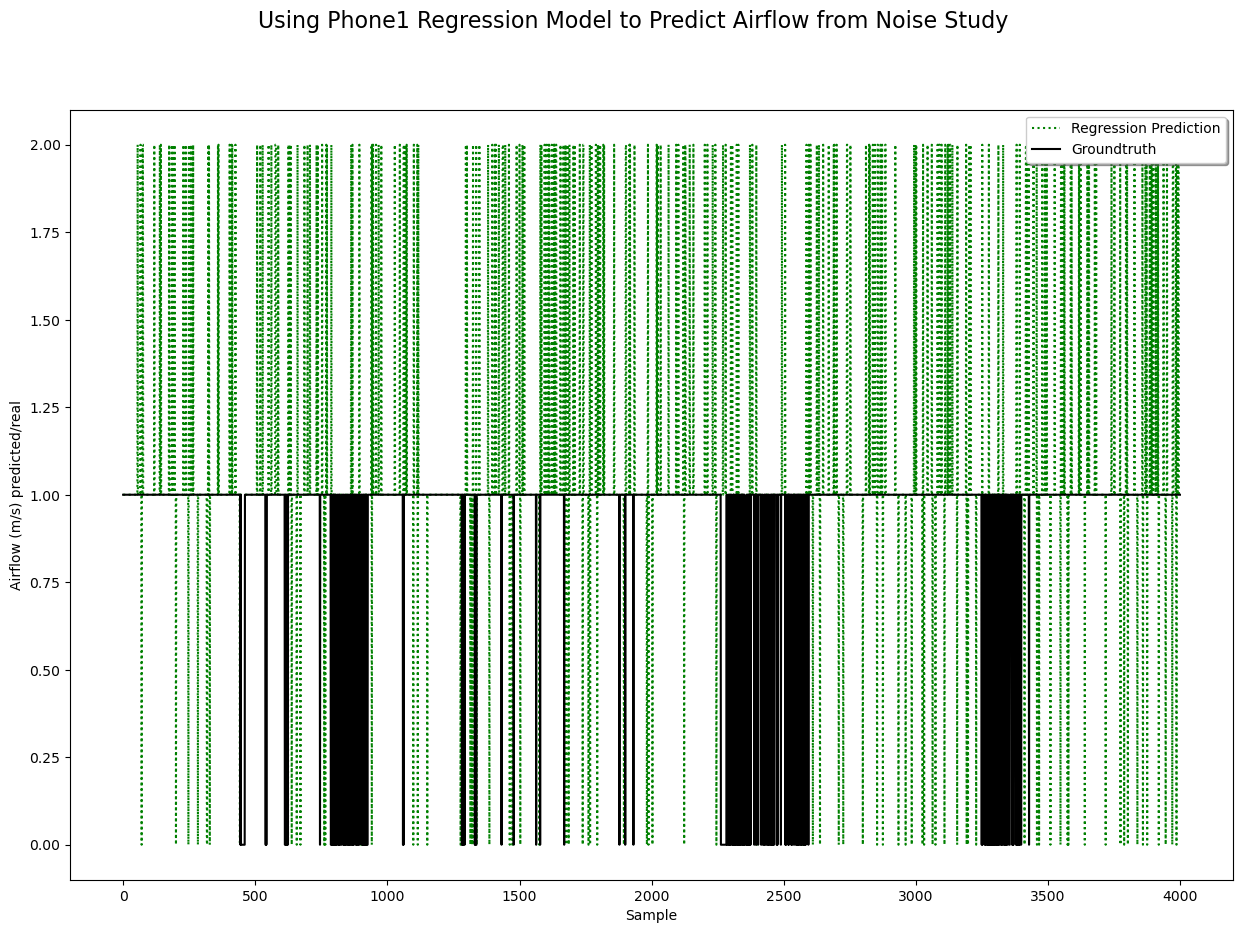

In [155]:
#Looking at predictions from Noise Study
data_dir = Path("./Noise-Study") 
df1 = pd.read_csv(data_dir / "fft_225_90_Vent1_30.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df1 = df1[df1['frequency'] != "clocktime"]
df1 = df1.dropna()

df2 = pd.read_csv(data_dir / "fft_225_90_Vent1_60.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df2 = df2[df2['frequency'] != "clocktime"]
df2 = df2.dropna()

df3 = pd.read_csv(data_dir / "fft_225_90_Vent1_90.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df3 = df3[df3['frequency'] != "clocktime"]
df3 = df3.dropna()

df4 = pd.read_csv(data_dir / "fft_225_90_Vent1_50Crowd.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df4 = df4[df4['frequency'] != "clocktime"]
df4 = df4.dropna()

df5 = pd.read_csv(data_dir / "fft_225_90_Vent1_50Vacuum.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df5 = df5[df5['frequency'] != "clocktime"]
df5 = df5.dropna()

df = df5
df = convert(df)
df.shape

indices = range(4000)
    
X = df[:,:-1]
X = X[indices, :4]
X.shape

row = vfunc(df[:,9])
df = np.append(df, row.reshape(-1,1), 1)
pred = vfunc(reg.predict(X))

y = df[indices, -1]
y.shape
    
print("Mean Squared Error: ", mean_squared_error(pred, y))
print("Score: ", accuracy_score(pred,y))

fig1, ax1 = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(10)
fig1.suptitle('Using Phone1 Regression Model to Predict Airflow from Noise Study', fontsize=16)
l0, = ax1.plot(pred, 'g:')
l1, = ax1.plot(y, 'k-')
ax1.legend((l0, l1), ('Regression Prediction', 'Groundtruth'), loc='upper right', shadow=True)
ax1.set_xlabel("Sample")
ax1.set_ylabel("Airflow (m/s) predicted/real")
plt.show()

MSE_30 = []
MSE_60 = []
MSE_90 = []
MSE_Crowd = []
MSE_Vacuum = []